In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#pip install chart-studio

In [4]:
#If error msg 'No module named 'chart_studio' pops up, a command 'pip install chart-studio' need to be run in the current environment

import chart_studio as chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [5]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
#Import Dataset 

q1 = pd.read_csv('Bike share ridership 2021-01.csv',encoding='cp437')
q2 = pd.read_csv('Bike share ridership 2021-02.csv')
q3 = pd.read_csv('Bike share ridership 2021-03.csv')
q4 = pd.read_csv('Bike share ridership 2021-04.csv')
q5 = pd.read_csv('Bike share ridership 2021-05.csv',encoding='cp437')
q6 = pd.read_csv('Bike share ridership 2021-06.csv')
q7 = pd.read_csv('Bike share ridership 2021-07.csv')
q8 = pd.read_csv('Bike share ridership 2021-08.csv')
q9 = pd.read_csv('Bike share ridership 2021-09.csv')
q10 = pd.read_csv('Bike share ridership 2021-10.csv')
q11 = pd.read_csv('Bike share ridership 2021-11.csv')
q12 = pd.read_csv('Bike share ridership 2021-12.csv')


In [7]:
full_dataset = [q1, q2, q3, q4, q5, q6, q7, q8, q9,q10, q11, q12]
bike_share = pd.concat(full_dataset)
bike_share.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,10644218,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member
1,10644220,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member
2,10644221,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member
3,10644222,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member
4,10644223,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member


In [8]:
bike_share['Start Time'] = pd.to_datetime(bike_share['Start Time'])
bike_share['End Time'] = pd.to_datetime(bike_share['End Time'])

bike_share.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member


In [9]:
#Time columns

bike_share['hour_start'] = bike_share['Start Time'].apply(lambda time: time.hour)
bike_share['month_start'] = bike_share['Start Time'].apply(lambda time: time.month)
bike_share['weekday_start'] = bike_share['Start Time'].apply(lambda time: time.dayofweek)

#Weekday columns
bike_share['hour_stop'] = bike_share['End Time'].apply(lambda time: time.hour)
bike_share['month_stop'] = bike_share['End Time'].apply(lambda time: time.month)
bike_share['weekday_stop'] = bike_share['End Time'].apply(lambda time: time.dayofweek)

#Update Month format for better visualizations
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month_start'] = bike_share['month_start'].map(mon)
bike_share['month_stop'] = bike_share['month_stop'].map(mon)

day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday_start'] = bike_share['weekday_start'].map(day)
bike_share['weekday_stop'] = bike_share['weekday_stop'].map(day)

In [10]:
bike_share.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri


In [11]:
palette = sns.color_palette('Paired')

Text(0, 0.5, 'Trip Count')

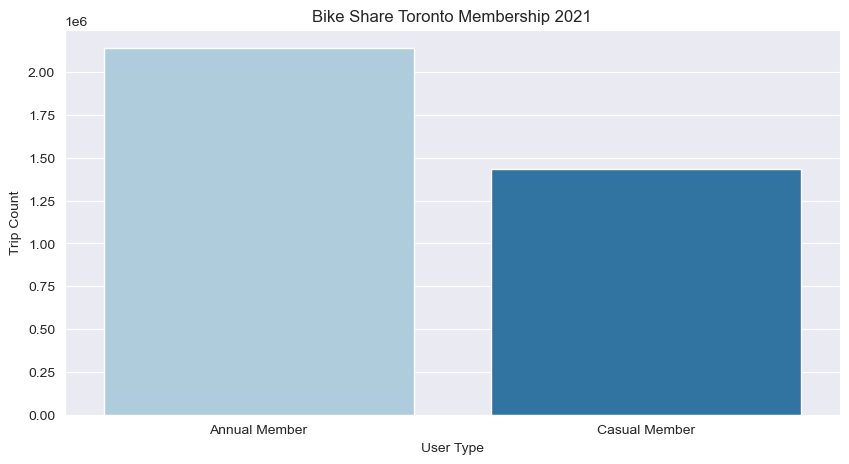

In [12]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p=sns.countplot(x='User Type',data=bike_share,palette=palette)
plt.title('Bike Share Toronto Membership 2021')
p.set_ylabel("Trip Count")

Text(0, 0.5, 'Trip Count')

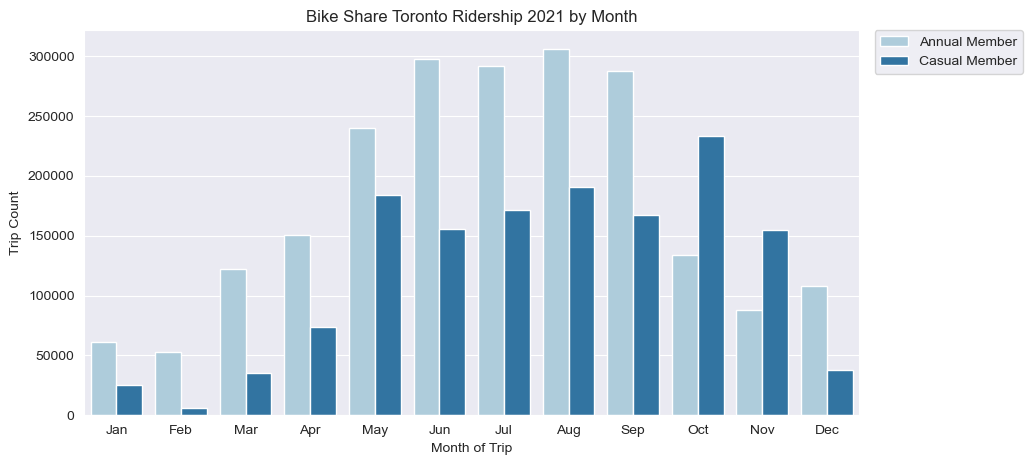

In [13]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p = sns.countplot(data=bike_share, x='month_start', hue='User Type', palette=palette)
plt.title('Bike Share Toronto Ridership 2021 by Month')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

p.set_xlabel("Month of Trip")
p.set_ylabel("Trip Count")

Text(0, 0.5, 'Trip Count')

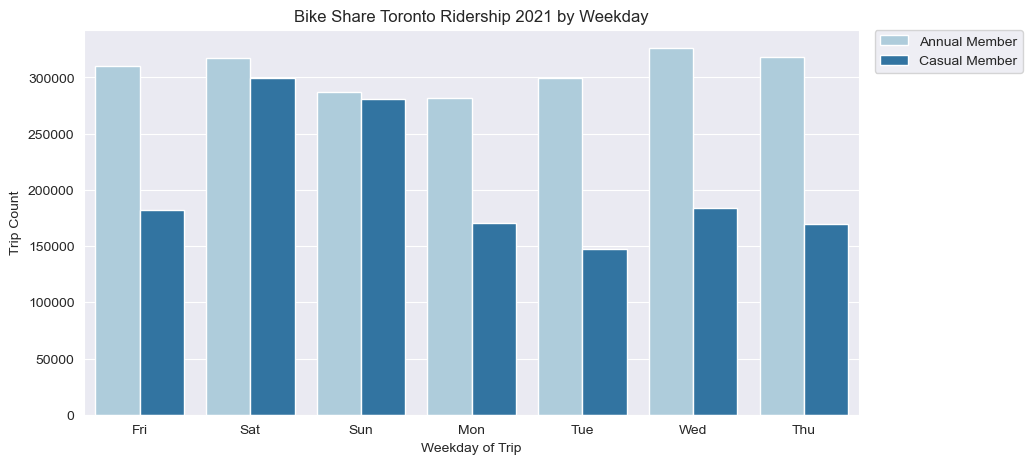

In [14]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p = sns.countplot(data=bike_share, x='weekday_start', hue='User Type', palette=palette)
plt.title('Bike Share Toronto Ridership 2021 by Weekday')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

p.set_xlabel("Weekday of Trip")
p.set_ylabel("Trip Count")

Text(0, 0.5, 'Trip Count')

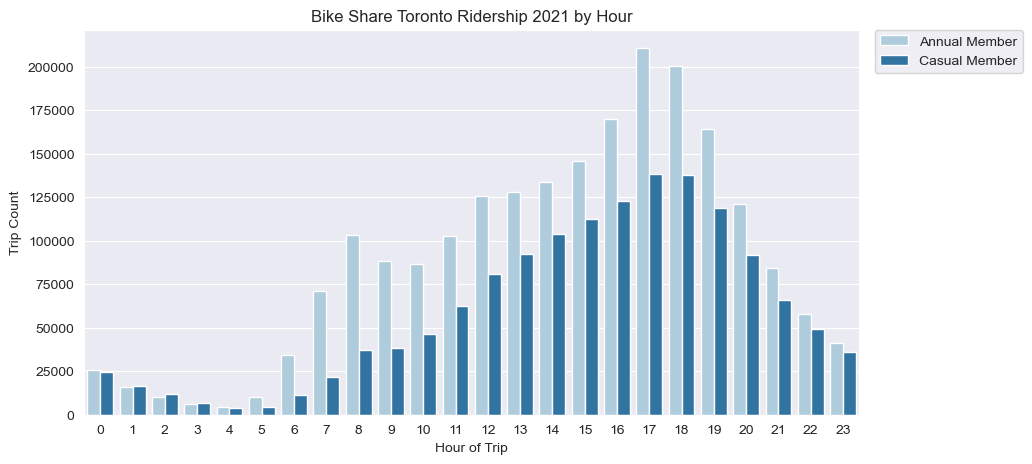

In [15]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p = sns.countplot(data=bike_share, x='hour_start', hue='User Type', palette=palette)
plt.title('Bike Share Toronto Ridership 2021 by Hour')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

p.set_xlabel("Hour of Trip")
p.set_ylabel("Trip Count")

Text(0.5, 0, 'Trip Count')

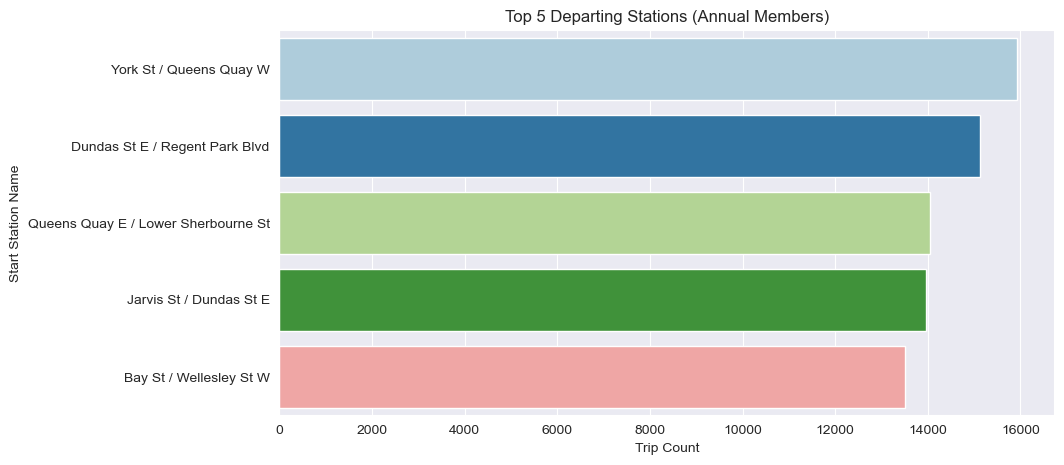

In [16]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p=sns.countplot(y=bike_share[bike_share['User Type']=='Annual Member']['Start Station Name'],data=bike_share, palette=palette,order=bike_share[bike_share['User Type']=='Annual Member']['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations (Annual Members)')
p.set_xlabel("Trip Count")

Text(0.5, 0, 'Trip Count')

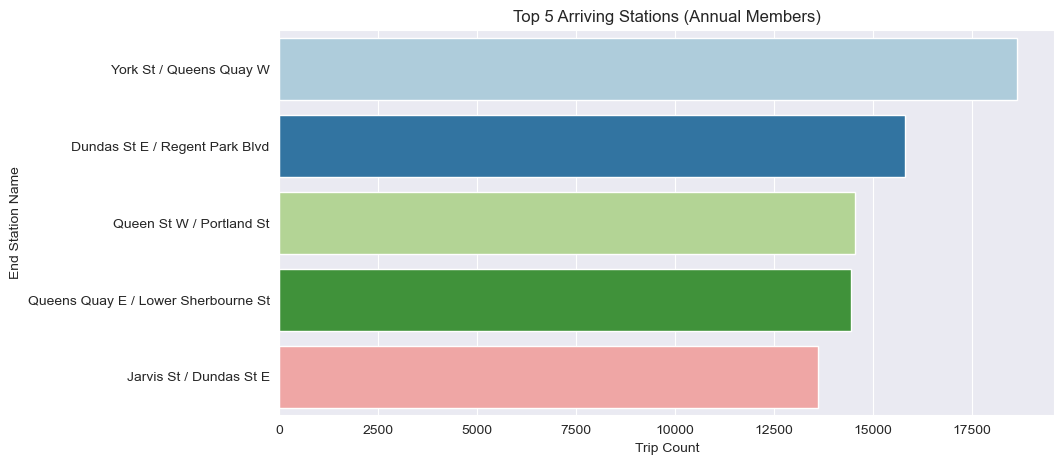

In [17]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p=sns.countplot(y=bike_share[bike_share['User Type']=='Annual Member']['End Station Name'],data=bike_share, palette=palette,order=bike_share[bike_share['User Type']=='Annual Member']['End Station Name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Annual Members)')
p.set_xlabel("Trip Count")

Text(0.5, 0, 'Trip Count')

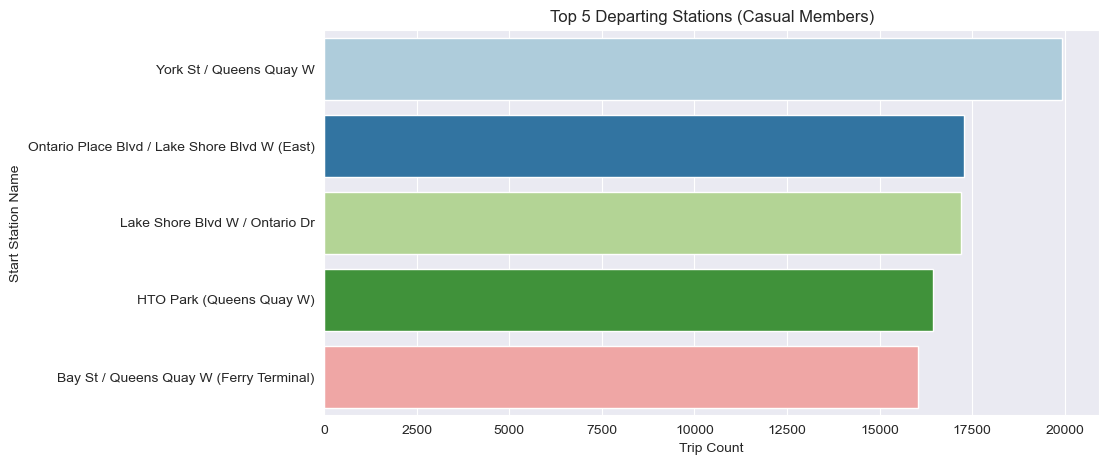

In [18]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p=sns.countplot(y=bike_share[bike_share['User Type']=='Casual Member']['Start Station Name'],data=bike_share, palette=palette,order=bike_share[bike_share['User Type']=='Casual Member']['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations (Casual Members)')
p.set_xlabel("Trip Count")

Text(0.5, 0, 'Trip Count')

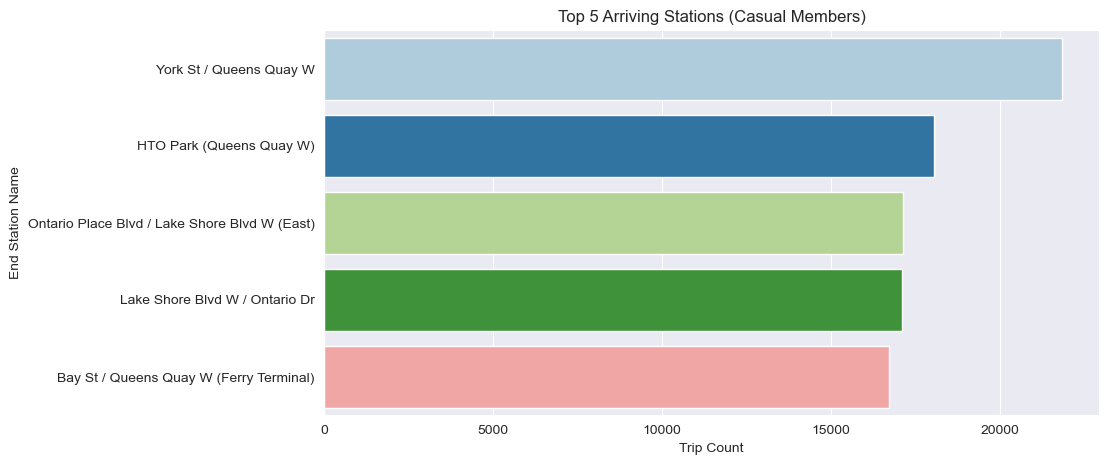

In [19]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
p=sns.countplot(y=bike_share[bike_share['User Type']=='Casual Member']['End Station Name'],data=bike_share, palette=palette,order=bike_share[bike_share['User Type']=='Casual Member']['End Station Name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Casual Members)')
p.set_xlabel("Trip Count")

In [20]:
daily_activity = bike_share.groupby(by=['weekday_start','hour_start']).count()['User Type'].unstack()
daily_activity.head()

hour_start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday_start,,,,,,,,,,,,,,,,,,,,,
Fri,6863,3970,2423,1294,1154,2230,7288,15088,22482,18618,...,29849,33674,39768,47289,46738,39592,30100,21682,16645,13878
Mon,5396,3041,1943,1084,1013,1969,6962,14039,20667,16452,...,27570,30795,37086,46834,45230,38159,27962,18786,12660,8462
Sat,10674,8001,6211,3363,1554,1578,3363,6969,12082,19103,...,52438,55073,54026,52113,48760,41378,31686,23585,18060,14544
Sun,11287,8775,6468,4016,1802,1487,3067,5953,9737,16287,...,50628,51270,49351,48456,45691,38431,29231,19986,13995,9164
Thu,5992,3119,1893,968,1035,2382,7798,16156,24674,18990,...,26607,30129,38361,51224,50367,41392,31126,21580,15110,11142


<AxesSubplot:xlabel='hour_start', ylabel='weekday_start'>

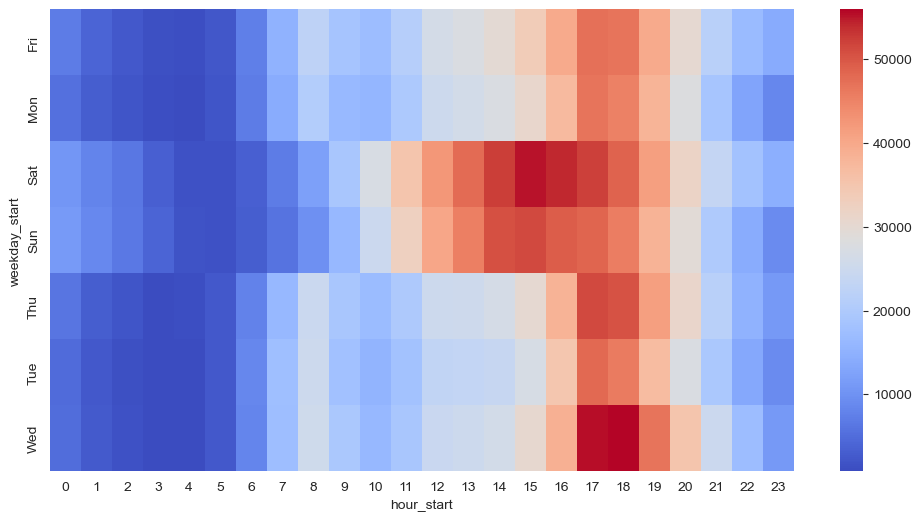

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(daily_activity,cmap='coolwarm')